# Introduction to machine learning
## HSE Lyceum (18.10)

### Импортируем необходимые пакеты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import math
%matplotlib inline

## Сгенерируем синтетические данные

Будем относить объекты, находящиеся либо выше зеленого графика и ниже синего графика, либо ниже оранжевого, к классу -1, остальные - к классу 1

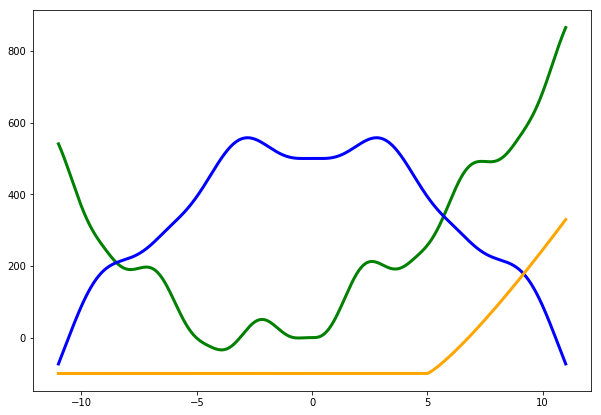

In [2]:
func1 = lambda x: ((50*(math.atan(x))**3+5*x**2+((4*math.sin(0.7*x))**(10))**(1/3)))
func2 = lambda x: (500-5*x**2+((4*math.sin(0.5*x))**(10))**(1/3))
func3 = lambda x: (-100 if x < 5 else 50*((x-5)**(1.2))-100)
x_vals = np.linspace(-11, 11, 1000)
y_vals1 = [func1(x) for x in x_vals]
y_vals2 = [func2(x) for x in x_vals]
y_vals3 = [func3(x) for x in x_vals]
plt.figure(figsize=(10,7))
plt.plot(x_vals, y_vals1, linewidth="3", color="green")
plt.plot(x_vals, y_vals2, linewidth="3", color="blue")
plt.plot(x_vals, y_vals3, linewidth="3", color="orange")
plt.show()

In [3]:
N = 10000

In [4]:
feature1 = 22 * np.random.random_sample(N) - 11
feature2 = 800 * np.random.random_sample(N) - 100
X = np.array([feature1, feature2]).T
X

array([[ -2.88375036e+00,   4.22240060e+02],
       [  3.83207389e+00,   4.87454448e+01],
       [  7.52535661e+00,   4.20538793e+01],
       ..., 
       [  2.93453108e+00,   4.50817872e+02],
       [  3.05655187e+00,   3.32987321e+02],
       [ -1.99788161e-01,   3.64838854e+01]])

### Сгенерируем ответы по данным

In [5]:
y = []
for e in X:
    if (e[1] > func1(e[0]) and e[1] < func2(e[0])) or e[1] < func3(e[0]):
        y.append(-1)
    else:
        y.append(1)
y = np.array(y)
y

array([-1,  1, -1, ..., -1, -1, -1])

Транспонируем матрицу признаков, чтобы потом легче было вывести

In [6]:
X =  X.T

### Выведем на экран

In [7]:
colors = np.zeros(N).astype(np.str)
colors[y == 1] = 'purple'
colors[y == -1] = 'orange'

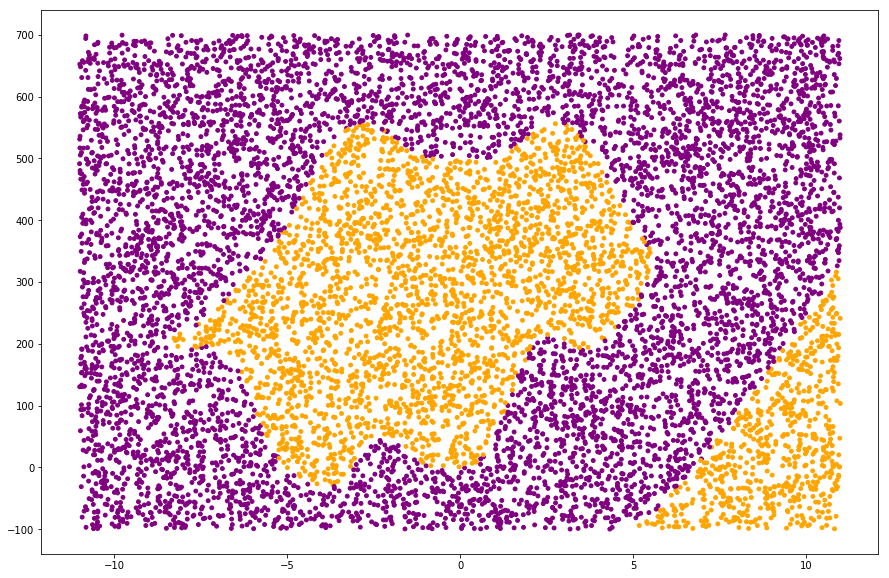

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(X[0], X[1], c=colors, s=15)
plt.show()

Транспонируем матрицу признаков обратно перед обучением

In [9]:
X = X.T

## Обучение

### Разделим выборку на обучающую и тестовую

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Функция выводы ROC-кривой на экран

In [11]:
def draw_roc(y_model, y_true):
    plt.figure(figsize=(7, 6))
    fpr, tpr, thresholds = roc_curve(y_true, y_model, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

Функция вывода матрицы несовпадений на экран

In [12]:
def print_conf_matrix(y_model, y_true):
    print(confusion_matrix(y_true, y_model))

Функция вывода неправильных объектов на экран

In [13]:
def draw_wrong(X_model, y_model, y_true):
    sizes = np.zeros(y_true.shape[0])
    sizes[y_model == y_true] = 15
    sizes[y_model != y_true] = 50
    alphas = np.ones(y_true.shape[0]).astype(np.float16)
    alphas[y_model == y_true] = 0.2
    rgba_colors = np.zeros((y_true.shape[0],4))
    rgba_colors[y_model != y_true,0] = 1.0
    rgba_colors[:,3] = alphas
    plt.figure(figsize=(10,7))
    X_model = X_model.T
    plt.scatter(X_model[0], X_model[1], color=rgba_colors, s=sizes)
    plt.show()
    X_model = X_model.T

### Логистическая регрессия

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_log = log_model.predict(X_test)
log_accuracy = np.mean(y_log == y_test)
log_accuracy

0.65939393939393942

In [16]:
roc_auc_score(y_test, y_log)

0.53266429403881366

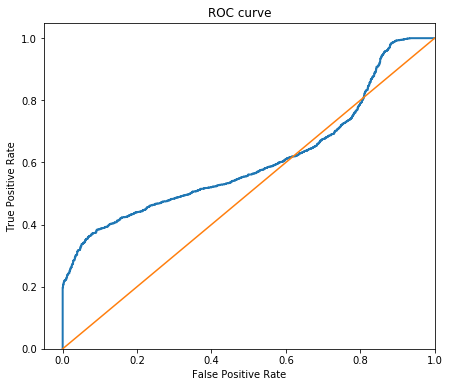

In [17]:
draw_roc(log_model.predict_proba(X_test)[:,1], y_test)

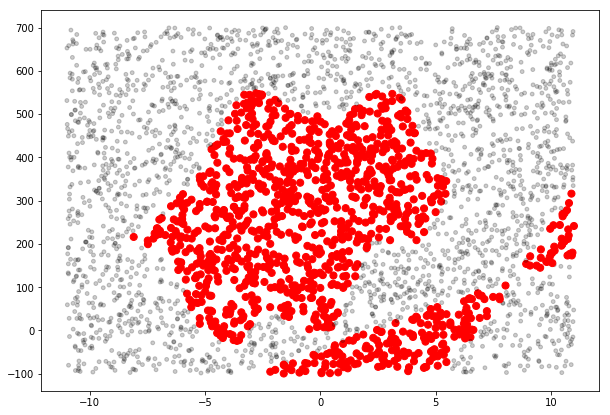

In [18]:
draw_wrong(X_test, y_log, y_test)

### Решающие деревья

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_tree = tree_model.predict(X_test)
tree_accuracy = np.mean(y_tree == y_test)
tree_accuracy

0.98090909090909095

In [21]:
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1])

0.97757199068312239

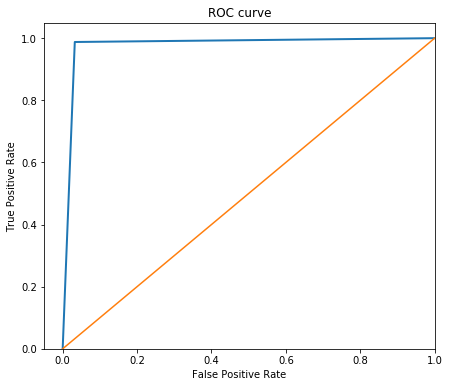

In [22]:
draw_roc(tree_model.predict_proba(X_test)[:,1], y_test)

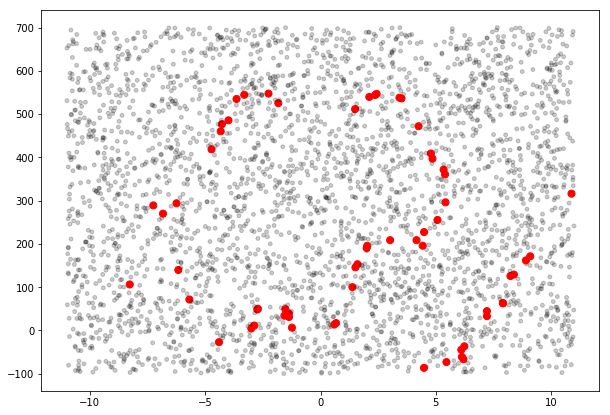

In [23]:
draw_wrong(X_test, y_tree, y_test)

### Случайный лес

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_forest = forest_model.predict(X_test)
forest_accuracy = np.mean(y_forest == y_test)
forest_accuracy

0.98484848484848486

In [26]:
roc_auc_score(y_test, y_forest)

0.9838973956590471

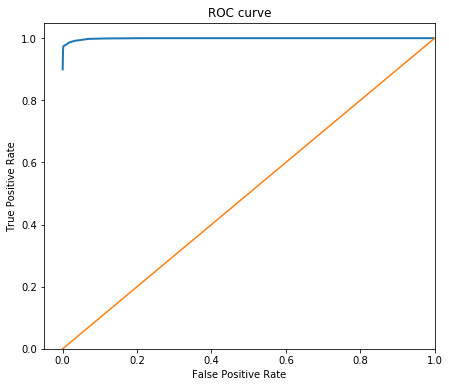

In [27]:
draw_roc(forest_model.predict_proba(X_test)[:,1], y_test)

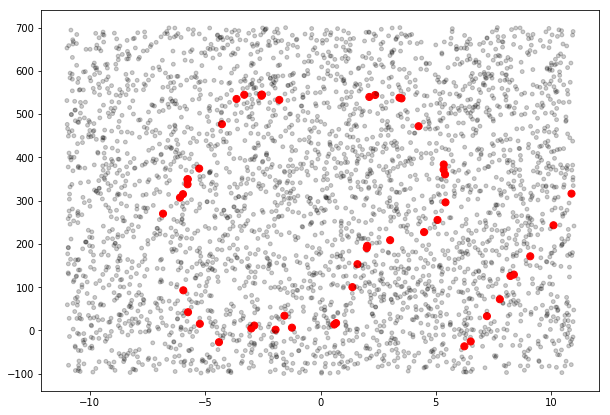

In [28]:
draw_wrong(X_test, y_forest, y_test)

### Метод k ближайших соседей

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
knn_accuracy = np.mean(y_knn == y_test)
knn_accuracy

0.93878787878787884

In [31]:
roc_auc_score(y_test, y_knn)

0.92728730830919781

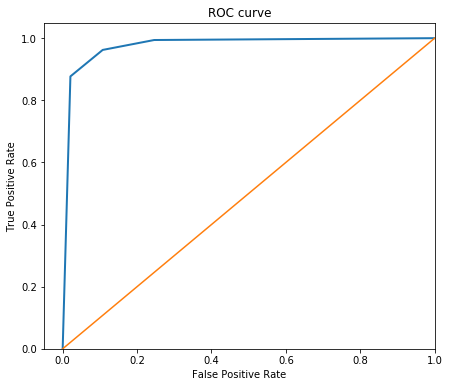

In [32]:
draw_roc(knn.predict_proba(X_test)[:,1], y_test)

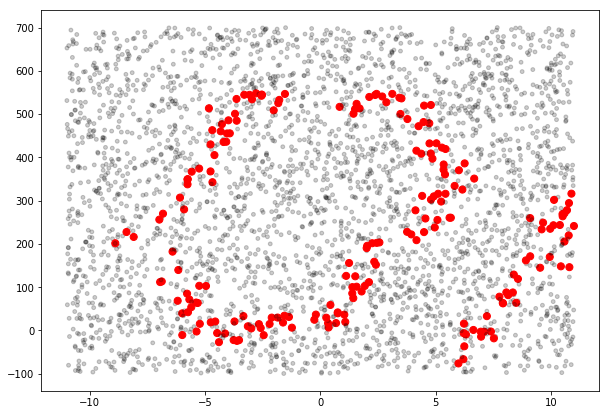

In [33]:
draw_wrong(X_test, y_knn, y_test)